In [1]:
import librosa as lib
import IPython.display as ipd
import numpy as np
from audiomentations import Compose, AddGaussianNoise, TimeStretch, PitchShift, Shift
import matplotlib.pyplot as plt
from glob import glob
import random

sr=22050

In [2]:
def normalize(sound):
    max_ = sound.max()
    min_ = sound.min()
    n_sound = (sound - min_) / (max_ - min_)

    return n_sound

In [8]:
def plot_spec(s1, s2):
    y = np.load(s1)
    y2 = np.load(s2)

    spec = lib.feature.melspectrogram(y, sr=sr)
    spec = lib.power_to_db(spec)
    
    spec2 = lib.feature.melspectrogram(y2, sr=sr)
    spec2 = lib.power_to_db(spec2)
    
    fig = plt.figure()

    fig.add_subplot(1, 2, 1)
    plt.imshow(normalize(spec))

    fig.add_subplot(1, 2, 2)
    plt.imshow(normalize(spec2))

    plt.show()

def pick_sample(sample_list, spieces):
    sample = random.choice(sample_list)
    while np.array(sample.split('[')[1].split(']')[0].split(' '), dtype='float32')[spieces] != 1:
        sample = random.choice(sample_list)
    return sample

def play(sample):
    y = np.load(sample)
    ipd.Audio(y, rate=sr)

In [9]:
train_list = open('../tp_train.txt').read().splitlines()
val_list = open('../tp_val.txt').read().splitlines()

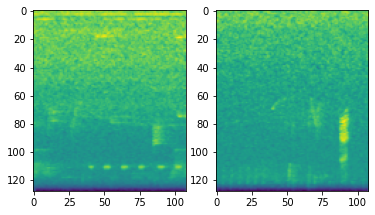

In [54]:
spieces = 20
train_sample = pick_sample(train_list, spieces)
val_sample = pick_sample(val_list, spieces)
plot_spec(train_sample, val_sample)

In [6]:
print(train_sample)
print(val_sample)

/home/rainforest/data_melspec/tp/2dc763e67_6.0_[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0].npy
/home/rainforest/data_melspec/tp/ed38c48b8_40.0_[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0].npy


In [55]:
y1, _ = lib.load('/home/datasets/rain_forest/train/287bf77ec.flac', sr=sr, offset=6, duration=2.5)
y2, _ = lib.load('/home/datasets/rain_forest/train/287bf77ec.flac', sr=sr, offset=12, duration=2.5)

plot_spec(y1, y2)

TypeError: expected str, bytes or os.PathLike object, not numpy.ndarray

3.7175166e-06